<a href="https://colab.research.google.com/github/kavya2299/Pytorch/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports and Data Loads


In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

train_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=10)

In [170]:
torch.set_printoptions(linewidth=120)
print(len(train_set))
print(train_set.targets) # targets are the train labels here
print(train_set.targets.bincount())

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


### Visualizing the data

2
<class 'tuple'>
label: 9
torch.Size([1, 28, 28])
torch.Size([28, 28])
9


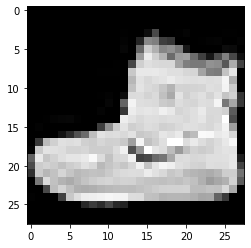

In [171]:
# to carry out sample-wise operations
sample = next(iter(train_set))
print(len(sample))
print(type(sample))
image, label = sample
print('label:', label)
print(image.shape)
print(image.squeeze().shape)
plt.imshow(image.squeeze(),cmap = 'gray')
# squeeze removes a dim whereas unsqueeze adds a dim
print(label)

2
<class 'list'>
label: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])
torch.Size([10, 1, 28, 28])
torch.Size([10])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


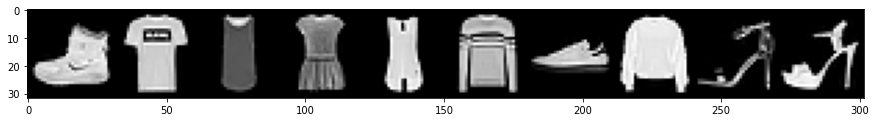

In [172]:
# to carry out batch-wise operations
batch = next(iter(train_loader))
print(len(batch))
print(type(batch))
images, labels = batch
print('label:', labels)
print(images.shape)
print(labels.shape)

grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(labels)

### Defining the architecture of the network
* __Forward Propagation function__

In [173]:
class Network(nn.Module): # every neural network requires a Module class to be extended
  def __init__(self):
    super().__init__()
    # dummy layer if assigned to a Nonetype object 

    # conv2d layer has in-channel describing the depth of an image being passed
    # out-channel describes the number of filters/kernels used
    # these output a rank 2 tensor
    
    #Linear layers use in_features and out_features which are rank 1 tensors
    
    # both conv and linear layers can store the learnable parameters in each of their layers

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)   
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  def forward(self,t):
    # input layer
    #t = t

    # hidden conv layer
    t = self.conv1(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    # hidden conv layer
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)

    # hidden linear layer
    t = t.reshape(-1,12*4*4)
    t = self.fc1(t)
    t = F.relu(t)

    # hidden linear layer
    t = self.fc2(t)
    t = F.relu(t)

    # output layer
    t = self.out(t)
    #t = F.softmax(t,dim=1)
    # HERE, WE ALREADY GET A SOFTMAXED RESULT BECAUSE OF THE CROSS-ENTROPY FUNCTION AS A LOSS FUNCTION APPLIED ON THE INPUTS

    return t  
network = Network()
network

# to get the weights of the nn
# network.conv1.weight

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

### Getting the shape of weights and biases(Parameters)

In [174]:
print(network.conv1.weight.shape)
print(network.conv2.weight.shape)
print(network.fc1.weight.shape)
print(network.fc2.weight.shape)
print(network.out.weight.shape)

torch.Size([6, 1, 5, 5])
torch.Size([12, 6, 5, 5])
torch.Size([120, 192])
torch.Size([60, 120])
torch.Size([10, 60])


In [175]:
# to access all the parameters at once
# parameters in the module class
# each layer has a bias and weights
# __repr__() function inside a class will override the existing functionality
for param in network.parameters():
  print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [176]:
for name,param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


Playing with weights

In [177]:
import torch
# tensors produced in each layer is wrapped in the parameter class to generate weights
in_features = torch.tensor([1,2,3,4],dtype=torch.float32)
weight = torch.tensor([[1,2,3,4],[2,3,4,5],[3,4,5,6]], dtype=torch.float32)
print(weight.matmul(in_features))
fc= nn.Linear(in_features=4, out_features=3,bias=False)
# if the bias is not turned off, the result is only close to, not equal to
fc.weight = nn.Parameter(weight)
# now on passing the in_feature matrix to the fc layer, 
# the result of the multiplication is of the in_features and the weight matrix that has been randomly created by Pytorch itself
print(fc(in_features))

tensor([30., 40., 50.])
tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)


Computation graphs 

* They keep track of all the operations that are carried out in a network.
* This serves a great role in designing the derivatives that are needed during backward propagation.
* These are needed only during the training process whereas it can be turned off when not training, explicitly


In [178]:
torch.set_grad_enabled(False) ## reduces memory consumption

In [179]:
# To change the shape of the image to the form (batch size, no of colour channels, height, width) 
image.unsqueeze(0).shape # gives a batch of 1

torch.Size([1, 1, 28, 28])

### Prediction tensor

In [180]:
image,label = sample
pred = network(image.unsqueeze(0))
print(pred.shape)
print(pred)
print(pred.argmax(dim=1))
print(F.softmax(pred, dim=1))
print(F.softmax(pred, dim=1).sum())


torch.Size([1, 10])
tensor([[-0.0128, -0.0930,  0.0655,  0.0789, -0.0774, -0.1018, -0.0362, -0.0515, -0.0263,  0.0138]])
tensor([3])
tensor([[0.1010, 0.0932, 0.1092, 0.1107, 0.0946, 0.0924, 0.0986, 0.0971, 0.0996, 0.1037]])
tensor(1.0000)


### Batch Processing

* no unsqueezing is required

In [181]:
print(images.shape)
print(labels.shape)
preds = network(images)
print(preds.shape)
print(preds)
print(preds.argmax(dim=1))
print(labels)
print(preds.argmax(dim=1).eq(labels)) # comparing the predictions with the labels
print(preds.argmax(dim=1).eq(labels).sum())# get the number of correct predictions
def get_correct(preds,labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

get_correct(preds,labels)  

torch.Size([10, 1, 28, 28])
torch.Size([10])
torch.Size([10, 10])
tensor([[-0.0128, -0.0930,  0.0655,  0.0789, -0.0774, -0.1018, -0.0362, -0.0515, -0.0263,  0.0138],
        [-0.0137, -0.0846,  0.0670,  0.0801, -0.0689, -0.1102, -0.0230, -0.0556, -0.0246,  0.0237],
        [-0.0067, -0.0962,  0.0700,  0.0776, -0.0778, -0.1133, -0.0304, -0.0504, -0.0324,  0.0222],
        [-0.0106, -0.0953,  0.0701,  0.0781, -0.0734, -0.1129, -0.0371, -0.0464, -0.0311,  0.0214],
        [-0.0127, -0.0912,  0.0672,  0.0718, -0.0702, -0.1083, -0.0377, -0.0494, -0.0277,  0.0283],
        [-0.0121, -0.0925,  0.0730,  0.0807, -0.0716, -0.1057, -0.0231, -0.0466, -0.0267,  0.0262],
        [-0.0084, -0.0942,  0.0752,  0.0797, -0.0713, -0.1124, -0.0302, -0.0531, -0.0354,  0.0256],
        [-0.0172, -0.0938,  0.0771,  0.0787, -0.0672, -0.1028, -0.0336, -0.0449, -0.0373,  0.0214],
        [-0.0076, -0.0958,  0.0682,  0.0799, -0.0796, -0.1141, -0.0318, -0.0473, -0.0314,  0.0215],
        [-0.0052, -0.0839,  0.0649

1

In [182]:
torch.set_grad_enabled(True)  

### Training 
#### For a single batch
* get a batch from the training set
* pass the batch to the network
* calculate the loss
* calculate the gradient wrt the parameters
* update the weights
* repeat the above steps for one epoch(one full pass through all the samples)
* repeat the above for as many epochs as desirable

#### Loss Calculations
```
preds = network(images)
loss = F.cross_entropy(preds,labels)
loss.item()
```
#### Gradient Calculations
```
print(network.conv1.weight.grad)
loss.backward() # to calculate the gradients by backprop
print(network.conv1.weight.grad.shape)
```
#### Optimizer to update the parameters
```
optimizer = optim.Adam(network.parameters(), lr=0.01) # optimize the parameters
print(loss.item())
result = get_correct(preds, labels)
print(result)
optimizer.step() # to updatec the weights

print("loss1:", loss.item())
preds = network(images)
loss = F.cross_entropy(preds,labels)
```

Code:


In [189]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader))
images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds,labels)

loss.backward()
optimizer.step()

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print("loss2:", loss.item())

loss1: 2.3033432960510254
loss2: 2.2757506370544434


### Training with all the batches



In [198]:
network = Network()

train_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_set, val_set = torch.utils.data.random_split(train_set, lengths=[40000,20000])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

  total_loss = 0
  total_correct = 0
  accuracy = 0

  for batch in train_loader: # get all the batches
    images, labels = batch

    preds = network(images)
    loss = F.cross_entropy(preds,labels)

    optimizer.zero_grad() # zero out the gradients to ensure that gradients are initially set to 0
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_correct(preds,labels)
    accuracy = total_correct/len(train_set)

  print("epoch:", epoch, "total_correct:", total_correct, "loss: {:.1f}".format(total_loss), "accuracy: {:.1f} %".format(accuracy*100))

epoch: 0 total_correct: 30446 loss: 253.0 accuracy: 76.1 %
epoch: 1 total_correct: 33908 loss: 164.1 accuracy: 84.8 %
epoch: 2 total_correct: 34422 loss: 149.3 accuracy: 86.1 %
epoch: 3 total_correct: 34792 loss: 141.2 accuracy: 87.0 %
epoch: 4 total_correct: 34986 loss: 135.0 accuracy: 87.5 %
epoch: 5 total_correct: 35178 loss: 130.0 accuracy: 87.9 %
epoch: 6 total_correct: 35209 loss: 130.2 accuracy: 88.0 %
epoch: 7 total_correct: 35204 loss: 128.7 accuracy: 88.0 %
epoch: 8 total_correct: 35398 loss: 124.3 accuracy: 88.5 %
epoch: 9 total_correct: 35438 loss: 122.9 accuracy: 88.6 %


In [200]:


images, labels = batch

val_pred = network(images) 

network = Network()

train_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_set, val_set = torch.utils.data.random_split(train_set, lengths=[40000,20000])
val_loader = torch.utils.data.DataLoader(val_set, batch_size=100)
val_batch = next(iter(val_loader))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

  total_loss = 0
  total_correct = 0
  accuracy = 0
  val_correct = 0
  val_accuracy = 0
  for batch in train_loader: # get all the batches
    images, labels = batch

    preds = network(images)
    loss = F.cross_entropy(preds,labels)

    optimizer.zero_grad() # zero out the gradients to ensure that gradients are initially set to 0
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_correct(preds,labels)
    accuracy = total_correct/len(train_set)

  for val_batch in val_loader:
    image_val, label_val = val_batch

    pred_val = network(image_val)
    
    val_correct += get_correct(pred_val,label_val)
    val_accuracy = val_correct/len(val_set)

  print("epoch:", epoch, "total_correct:", total_correct, "loss: {:.1f}".format(total_loss), "accuracy: {:.1f} %".format(accuracy*100), "val_accuracy: {:.1f} %".format(val_accuracy*100))

epoch: 0 total_correct: 30148 loss: 260.0 accuracy: 75.4 % val_accuracy: 81.6 %
epoch: 1 total_correct: 33647 loss: 175.2 accuracy: 84.1 % val_accuracy: 84.5 %
epoch: 2 total_correct: 34298 loss: 155.6 accuracy: 85.7 % val_accuracy: 85.3 %
epoch: 3 total_correct: 34654 loss: 146.7 accuracy: 86.6 % val_accuracy: 85.5 %
epoch: 4 total_correct: 34850 loss: 141.5 accuracy: 87.1 % val_accuracy: 85.8 %
epoch: 5 total_correct: 34984 loss: 139.2 accuracy: 87.5 % val_accuracy: 87.2 %
epoch: 6 total_correct: 35107 loss: 133.4 accuracy: 87.8 % val_accuracy: 86.9 %
epoch: 7 total_correct: 35285 loss: 131.5 accuracy: 88.2 % val_accuracy: 87.0 %
epoch: 8 total_correct: 35238 loss: 130.6 accuracy: 88.1 % val_accuracy: 87.1 %
epoch: 9 total_correct: 35362 loss: 127.6 accuracy: 88.4 % val_accuracy: 87.0 %
